In [46]:
#Import the correct dependencies
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [47]:
#Read the CSV file into a pandas dataframe
file = "Resources/myopia.csv"

In [34]:
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [35]:
# Remove the "MYOPIC" column from the dataset.
df2 = df.drop(['MYOPIC'], axis=1)
df2.head()

labels = df['AL']


In [36]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
df_scaled = StandardScaler().fit_transform(df2)
print(df_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [37]:
# Perform dimensionality reduction with PCA. How did the number of the features change?
# Initialize PCA model
pca = PCA(n_components=2)

# Get two principal components for the iris data.
scaled_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(
    data=scaled_pca, columns=["principal component 1", "principal component 2"]
)
df_pca.head()

,principal component 1,principal component 2
0,0.535503,1.145004
1,-0.624706,-1.575786
2,-0.933479,-0.717076
3,0.106354,1.192475
4,-0.388503,-2.839655


In [38]:
# Fetched the explained variance for PCA
pca.explained_variance_ratio_

array([0.21177355, 0.15659716])

In [39]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation. 

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(df2)
tsne_features.shape


/Users/kaylagranados/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [40]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?

# Prepare to plot the dataset
# The first column of transformed features
df2['x'] = tsne_features[:,0]

# The second column of transformed features
df2['y'] = tsne_features[:,1]

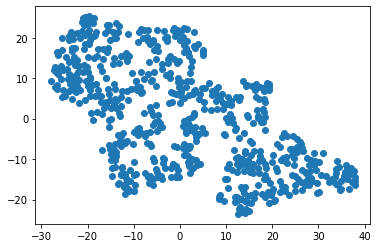

In [41]:
# Visualize the clusters
plt.scatter(df2['x'], df2['y'])
plt.show()

In [42]:
labels.value_counts()

22.740000    8
22.379999    8
22.400000    7
22.530001    7
22.500000    7
            ..
23.850000    1
23.770000    1
23.120001    1
23.469999    1
21.690001    1
Name: AL, Length: 254, dtype: int64

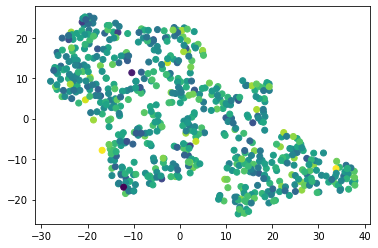

In [43]:
# Visualize the clusters with color
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

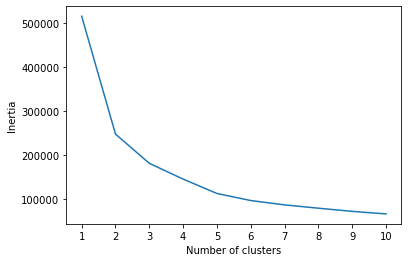

In [44]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:
# Use a for loop to determine the inertia for each k between 1 through 10.
# If possible, determine where the elbow of the plot is, and at which value of k it appears.
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

# The patients can be clustered as in evident in tSNE output and scatter plot. They can be clustered in 2 number of groups as evident by the location of the bend in the elbow plot.  